In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [18]:
df = pd.read_csv("C://Users//mvish//Desktop//blogs_categories.csv")
df


,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


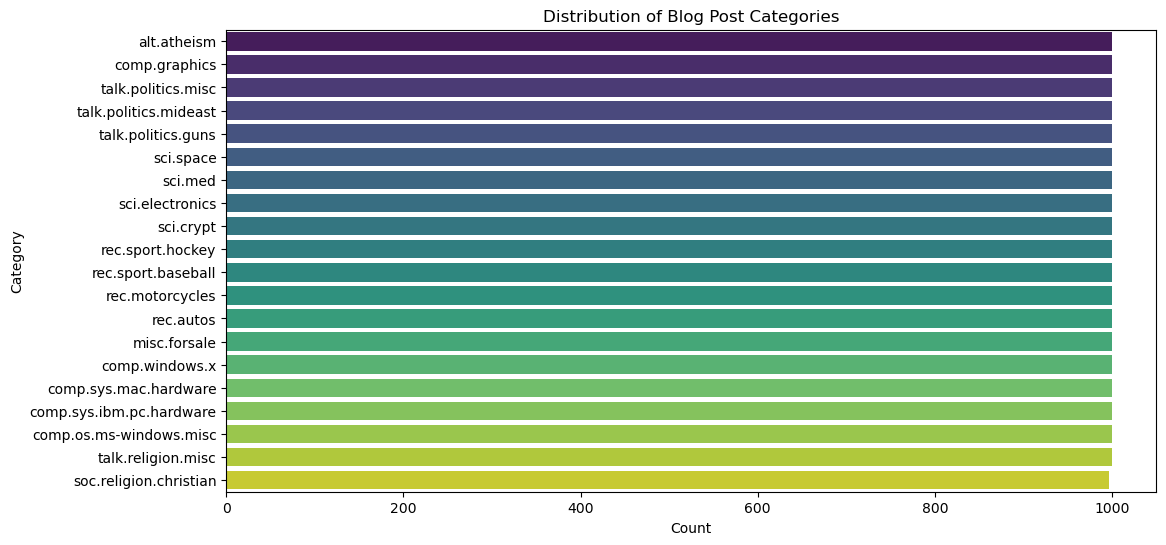

In [42]:
# Histogram of Blog Post Categories
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Labels'], order=df['Labels'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Blog Post Categories')
plt.show()


In [19]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mvish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mvish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [22]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [23]:
lemmatizer

<WordNetLemmatizer>

In [24]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Data' column
df['Processed_Data'] = df['Data'].apply(preprocess_text)

# Display the first few rows to check the preprocessing
df.head()

,Unnamed: 0,Data,Labels,Processed_Data
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...


In [46]:
df['Processed_Data'] = df['Data'].apply(preprocess_text)

# Calculate word counts
df['Word_Count'] = df['Processed_Data'].apply(lambda x: len(x.split()))


C:\Users\mvish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


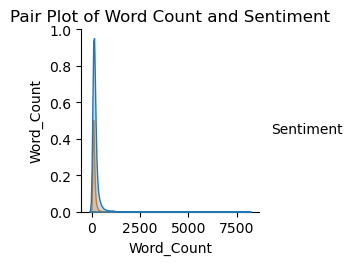

In [47]:
sns.pairplot(df, hue='Sentiment', vars=['Word_Count'])
plt.title('Pair Plot of Word Count and Sentiment')
plt.show()

In [26]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Data'])
y = df['Labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting matrices
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(15997, 250983) (4000, 250983) (15997,) (4000,)


In [27]:
X

<19997x250983 sparse matrix of type '<class 'numpy.float64'>'
	with 2568917 stored elements in Compressed Sparse Row format>

In [28]:
y

0               alt.atheism
1               alt.atheism
2               alt.atheism
3               alt.atheism
4               alt.atheism
                ...        
19992    talk.religion.misc
19993    talk.religion.misc
19994    talk.religion.misc
19995    talk.religion.misc
19996    talk.religion.misc
Name: Labels, Length: 19997, dtype: object

In [30]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [31]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)


In [32]:
y_pred

array(['rec.sport.hockey', 'comp.sys.mac.hardware',
       'comp.sys.ibm.pc.hardware', ..., 'rec.motorcycles',
       'talk.politics.guns', 'comp.windows.x'], dtype='<U24')

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [34]:

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.89425
Precision: 0.8934047603502218
Recall: 0.89425
F1 Score: 0.8926119876486682


In [35]:
# Display the classification report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.86      0.90      0.88       179
 comp.os.ms-windows.misc       0.94      0.87      0.90       226
comp.sys.ibm.pc.hardware       0.84      0.84      0.84       204
   comp.sys.mac.hardware       0.89      0.96      0.92       205
          comp.windows.x       0.97      0.94      0.95       186
            misc.forsale       0.90      0.78      0.83       190
               rec.autos       0.91      0.94      0.92       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.88      0.98      0.93       200
         sci.electronics       0.94      0.89      0.91       227
                 sci.med       1.00      0.94      0.97       196
         

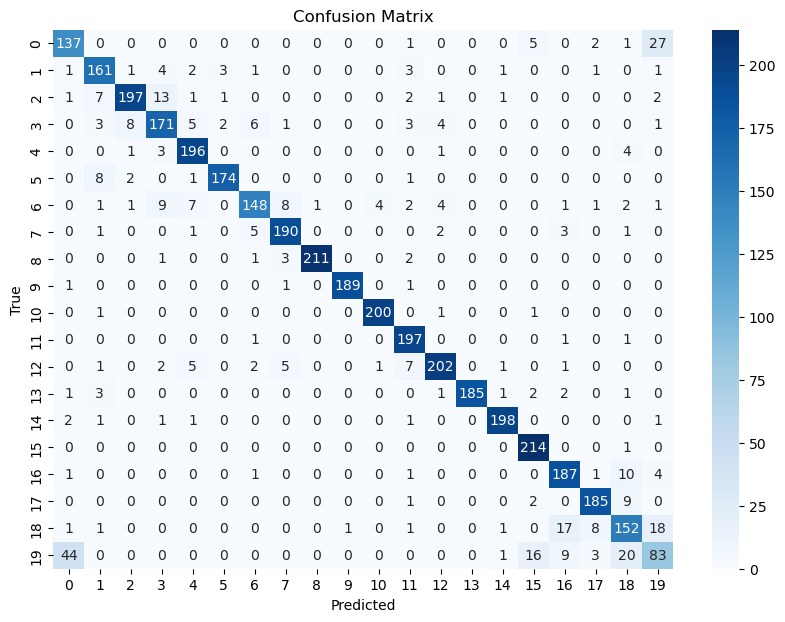

In [36]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [38]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----- --------------------------------- 81.9/626.3 kB 327.3 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 327.3 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 448.2 kB/s eta 0:00:02
   ------------- ------------------------ 225.3/626.3 kB 625.1 kB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


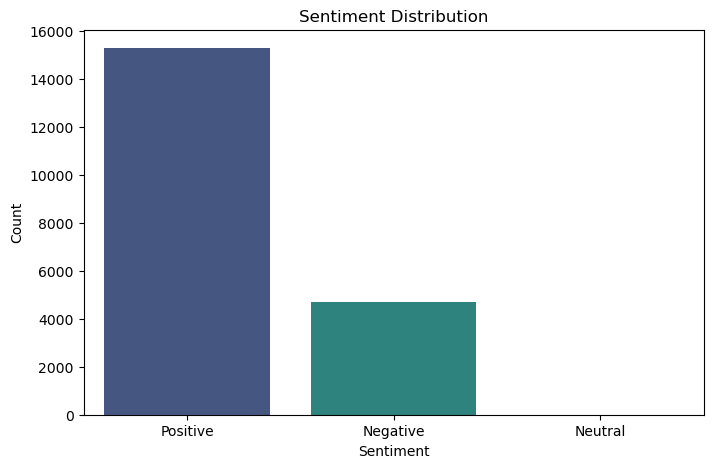

In [41]:
# Display the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

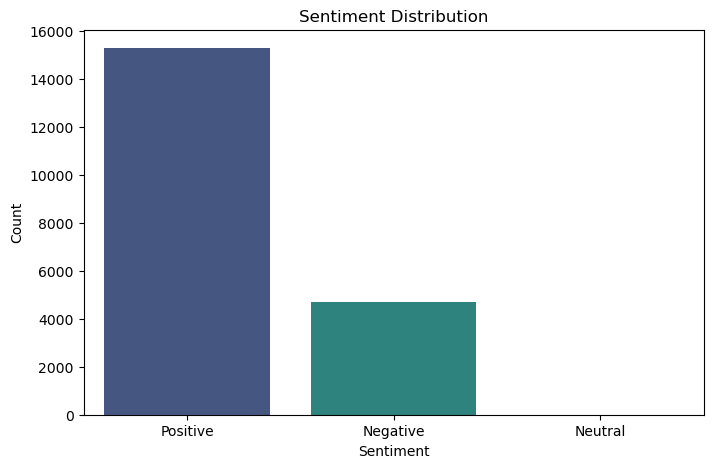

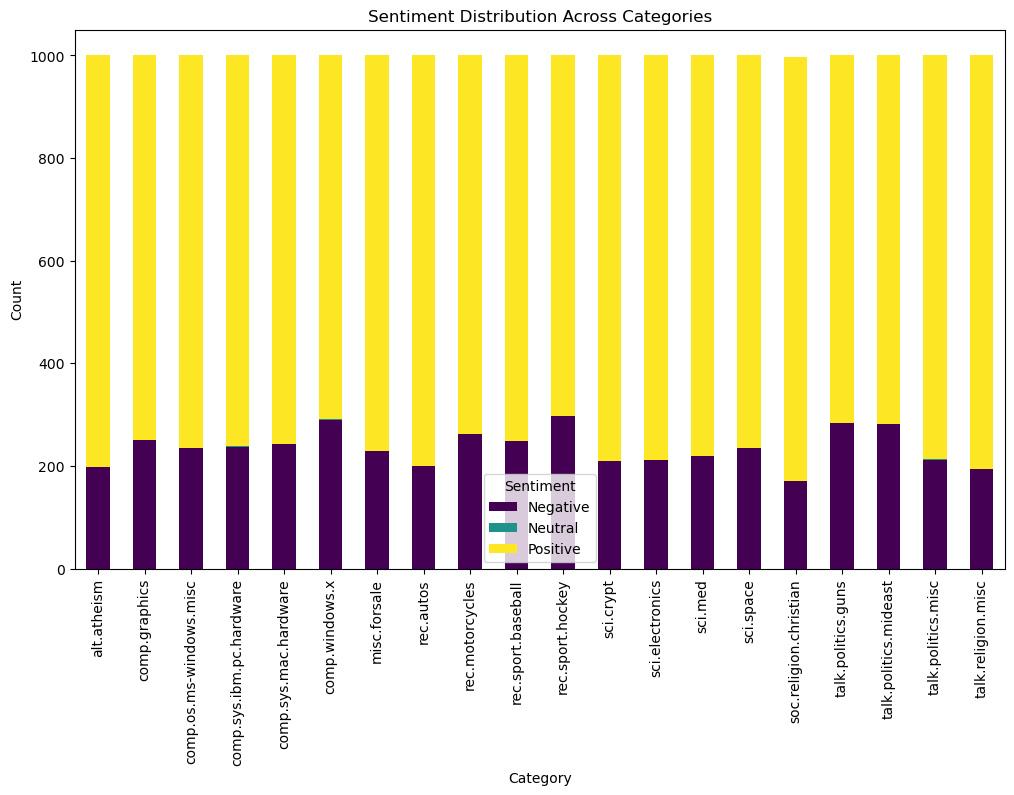

In [40]:

# Analyze sentiment distribution across categories
sentiment_category_counts = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
sentiment_category_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Categories')
plt.show()